In [1]:
import numpy as np
import pandas as pd
import itertools

def polynomialFeatures(X, degree):
    if degree <= 1:
        
        return X
    
    else:
        
        d = X.shape[1]
        int_terms = list(itertools.combinations(range(X.shape[1]), 2))
        for term in int_terms:
            X = np.c_[X, X[:, term[0]]*X[:, term[1]]]
    
        for i in range(1, degree):
            for j in range(d):
                X = np.c_[X, X[:, j]**(i+1)]
            
        return X

def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

def learning_curve(model, X, Y, cv, train_size=1, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    size = train_size
    train_scores = []
    val_scores = []
    
    while size <= len(Y):
        partitions = k_partition(cv, X[:size, :], Y[:size])
        train_avg = []
        val_avg = []
        for i in range(cv):
            training_folds = np.concatenate([partitions[j] for j in range(len(partitions)) if j != i], axis = 0)
            test_fold = partitions[i]
            X_tr = training_folds[:, :(training_folds.shape[1]-1)]
            y_tr = training_folds[:, (training_folds.shape[1]-1)]
            X_val = test_fold[:, :(test_fold.shape[1]-1)]
            y_val = test_fold[:, (test_fold.shape[1]-1)]
                
            model.fit(X_tr, y_tr, learning_rate=learning_rate, epochs=epochs, tol=tol, regularizer=regularizer, lambd=lambd)
                
            y_train_pred = model.predict(X_tr)
            y_pred = model.predict(X_val)
            
            train_avg.append(np.sqrt(mse(y_tr, y_train_pred)))
            val_avg.append(np.sqrt(mse(y_val, y_pred)))
            
        train_scores.append(np.mean(train_avg))
        val_scores.append(np.mean(val_avg))
        size += train_size
        
    return train_scores, val_scores
        
    
class Linear_Regression:
    
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, method='batch', **kwargs):
        m = X.shape[0]
        theta = np.random.randn(X.shape[1], 1)
        Y = np.reshape(Y, (Y.shape[0], 1))
        
        if method == 'batch':
            if tol is None:
                if regularizer is None:
                    for i in range(epochs):
                        
                        theta = theta - (1/m)*learning_rate*(X.T.dot((X.dot(theta)-Y)))
                    
                    self.theta = theta
                
                else:
                    for i in range(epochs):
                
                        theta = theta - self.reg_cost_func(X, Y, regularizer, lambd, learning_rate, theta, m)
                
                    self.theta = theta
                
            else:
                if regularizer is None:
                    error = mse(Y, X.dot(theta))
                    for i in range(epochs):
                
                        theta = theta - (1/m)*learning_rate*(X.T.dot((X.dot(theta)-Y)))
                        new_error = mse(Y, X.dot(theta))
                    
                        if new_error > (error - tol):
                            break
                        else:
                            error = new_error
                     
                    self.theta = theta
                
                else:
                    error = mse(Y, X.dot(theta))
                    for i in range(epochs):
                
                        theta = theta - self.reg_cost_func(X, Y, regularizer, lambd, learning_rate, theta, m)
                        new_error = mse(Y, X.dot(theta))
                    
                        if new_error > (error - tol):
                            break
                        else:
                            error = new_error
                        
                    self.theta = theta
                
        if method == 'stochastic':
            if tol is None:
                if regularizer == None:
                    for i in range(epochs):
                        if epochs > 10:
                            learning_rate = .5*learning_rate
                        for j in range(Y.shape[0]):
                            index = np.random.randint(0, X.shape[0])
                            X_i = X[index, :].reshape(1, X.shape[1])
                            y_i = y[index].reshape(1,1)
                            
                            theta = theta - (1/m)*learning_rate*(X_i.T.dot((X_i.dot(theta)-y_i)))
                            
                    self.theta = theta
                
                else:

                    for i in range(epochs):
                        if epochs > 10:
                            learning_rate = .5*learning_rate
                        for j in range(Y.shape[0]):
                            index = np.random.randint(0, X.shape[0])
                            X_i = X[index, :].reshape(1, X.shape[1])
                            y_i = y[index].reshape(1,1)
                            
                            theta = theta - self.reg_cost_func(X_i, y_i, regularizer, lambd, learning_rate, theta, m)
                            
                    self.theta = theta
                    
            else:
                if regularizer == None:
                    index = np.random.randint(0, X.shape[0])
                    X_i = X[index, :].reshape(1, X.shape[1])
                    y_i = y[index].reshape(1,1)
                    error = mse(y_i, X_i.dot(theta))
                    for i in range(epochs):
                        if epochs > 10:
                            learning_rate = .5*learning_rate
                        for j in range(Y.shape[0]):
                            index = np.random.randint(0, X.shape[0])
                            X_i = X[index, :].reshape(1, X.shape[1])
                            y_i = y[index].reshape(1,1)
                            
                            theta = theta - (1/m)*learning_rate*(X_i.T.dot((X_i.dot(theta)-y_i)))
                            new_error = mse(y_i, X_i.dot(theta))
                    
                        if new_error > (error - tol):
                            break
                        else:
                            error = new_error
                            
                    self.theta = theta
                    
                else:
                    index = np.random.randint(0, X.shape[0])
                    X_i = X[index, :].reshape(1, X.shape[1])
                    y_i = y[index].reshape(1,1)
                    error = mse(y_i, X_i.dot(theta))
                    for i in range(epochs):
                        if epochs > 10:
                            learning_rate = .5*learning_rate
                        for j in range(Y.shape[0]):
                            index = np.random.randint(0, X.shape[0])
                            X_i = X[index, :].reshape(1, X.shape[1])
                            y_i = y[index].reshape(1,1)
                            
                            theta = theta - self.reg_cost_func(X_i, y_i, regularizer, lambd, learning_rate, theta, m)
                            new_error = mse(y_i, X_i.dot(theta))
                    
                        if new_error > (error - tol):
                            break
                        else:
                            error = new_error
                            
                    self.theta = theta
    
    def reg_cost_func(self, X, Y, regularizer, lambd, learning_rate, theta, m):
        if regularizer == 'l1':
            return (1/m)*learning_rate*(X.T.dot((X.dot(theta)-Y)))-(learning_rate*lambd/m)*np.sign(theta)
        
        if regularizer == 'l2':
            return (1/m)*learning_rate*(X.T.dot((X.dot(theta)-Y)))-(learning_rate*lambd/m)*theta
                
            
    def predict(self, X):
        
        return X.dot(self.theta)
    
    

def partition(X, y, test_size):

    indices = np.random.permutation(X.shape[0])
    
    train_idx = indices[:int(np.round((1-test_size)*len(X), decimals = 0))]
    test_idx = indices[int(np.round((1-test_size)*len(X), decimals = 0)):]
    
    X_train = X[train_idx, :]
    y_train = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    
    return X_train, X_test, y_train, y_test

def kFold(folds, data, labels, model, model_args, error_function):
    learning_rate = model_args['learning_rate']
    regularizer = model_args['regularizer']
    lambd = model_args['lambd']
    cv_table = {'learning_rate': [], 'regularizer': [], 'lambd': [],
                'expected labels': [], 'predicted labels': [], error_function: []}
    partitions = k_partition(folds, data, labels)
    for lr in learning_rate:
        for reg in regularizer:
            for l in lambd:
                scores = np.empty((folds,1))
                for i in range(folds):
                    training_folds = np.concatenate([partitions[j] for j in range(len(partitions)) if j != i], axis = 0)
                    test_fold = partitions[i]
                    X_tr = training_folds[:, :(training_folds.shape[1]-1)]
                    y_tr = training_folds[:, (training_folds.shape[1]-1)]
                    X_val = test_fold[:, :(test_fold.shape[1]-1)]
                    y_val = test_fold[:, (test_fold.shape[1]-1)]
                
                    model.fit(X_tr, y_tr, learning_rate=lr, epochs=1000, tol=None, regularizer=reg, lambd=l)
                
                    y_train_pred = model.predict(X_tr)
                    y_predict = model.predict(X_val)
                            
                    score = mse(y_val, y_predict)    
                    
                    scores[i] = score
                    
                
                cv_table[error_function].append(np.mean(scores))
                cv_table['learning_rate'].append(lr)
                cv_table['regularizer'].append(reg)
                cv_table['lambd'].append(l)
                cv_table['expected labels'].append(y_val)
                cv_table['predicted labels'].append(y_predict)
            
    return cv_table

def k_partition(folds, data, labels):
    partitions = []
    
    indices = np.random.permutation(data.shape[0])
    
    fold_size = int(np.floor(len(data)/folds))
    for k in range(folds):
        X_partition = X[indices[k*fold_size:(k+1)*fold_size]]
        y_partition = y[indices[k*fold_size:(k+1)*fold_size]]
        y_partition = np.array([y_partition])
        partition = np.concatenate((X_partition, y_partition.T), axis = 1)
        
        partitions.append(partition)
        
    return partitions

In [2]:
df = pd.read_csv('C:/Users/Henry/CSCE 478/Datasets/DataScienceRepository/winequality-red.csv')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df = df.sample(frac=1)

C:\Users\Henry\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


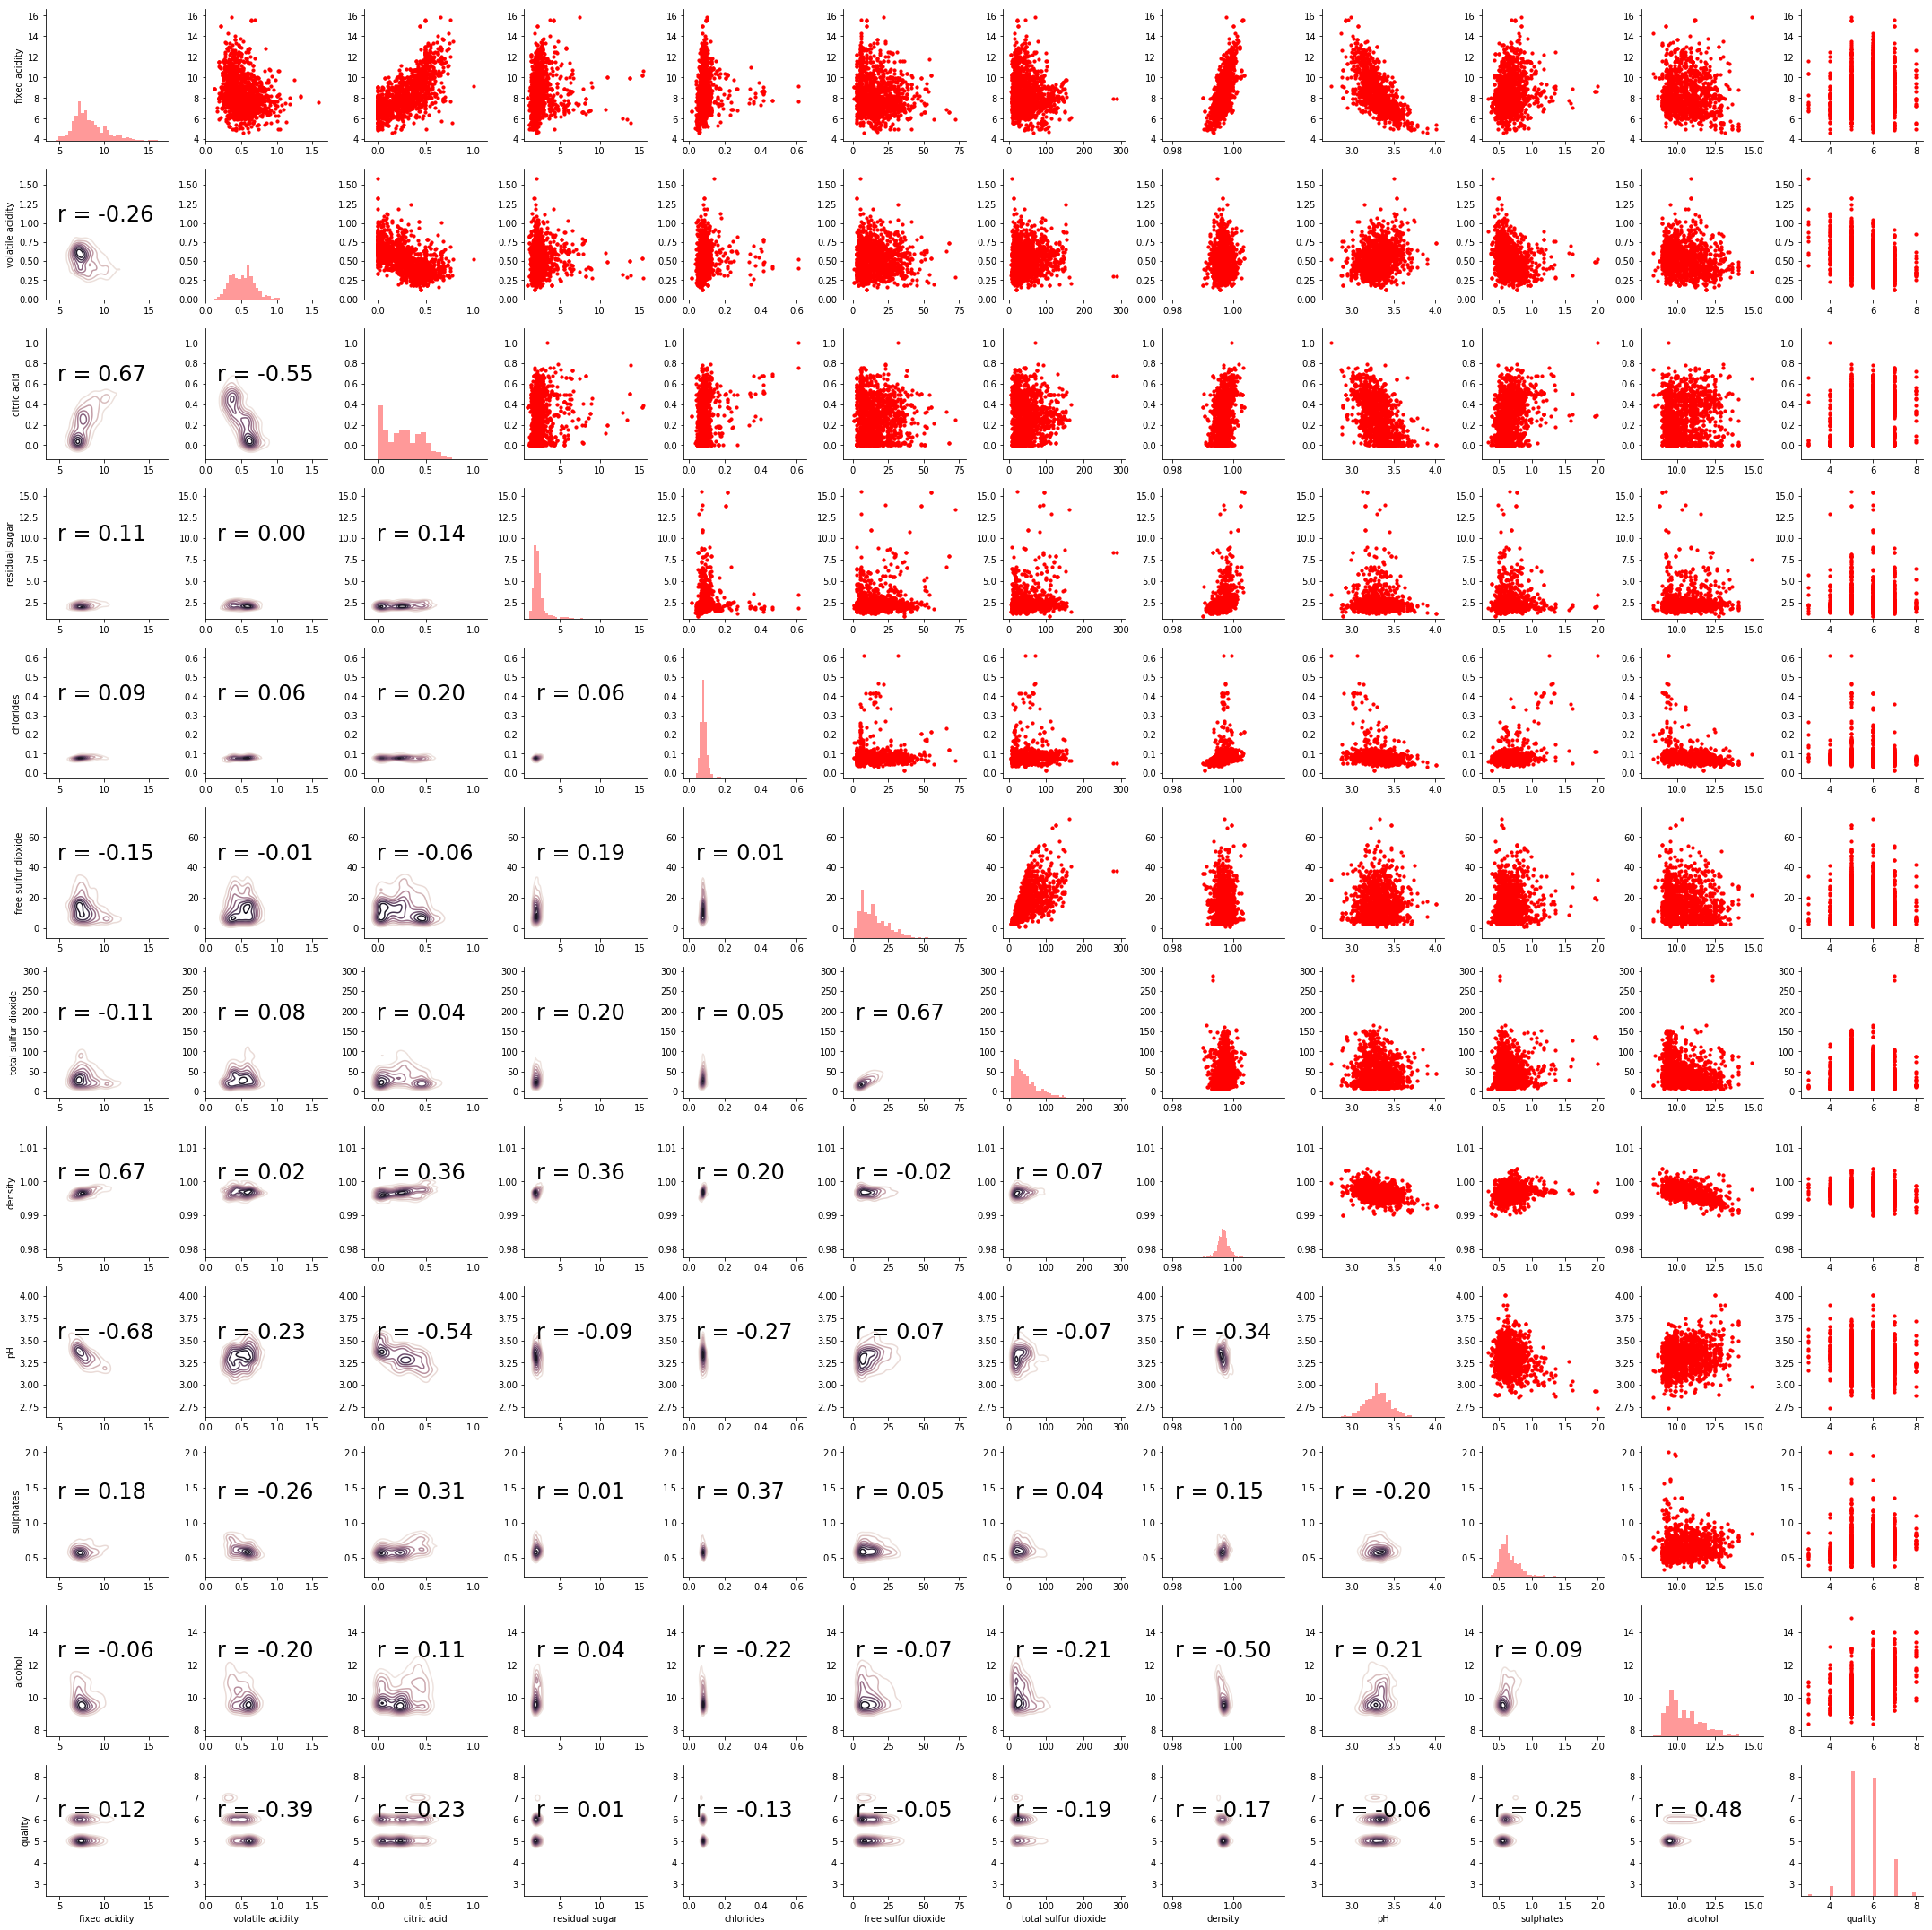

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
               xy=(.1, .6), xycoords=ax.transAxes,
                size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = .1,
                            hue = .5, as_cmap=True)

sns.set_context(font_scale=2)

g = sns.PairGrid(df)

g.map_upper(plt.scatter, s=10, color = 'red')

g.map_diag(sns.distplot, kde=False, color = 'red')
  
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [5]:
df = df.drop(['fixed acidity', 'free sulfur dioxide'], axis = 1)

In [6]:
X = df.iloc[:, :9].values
y = df.iloc[:, 9].values
#X = np.c_[np.ones((X.shape[0], 1)), X]
X_train, X_test, y_train, y_test = partition(X, y, .2)
y_test = np.reshape(y_test, (y_test.shape[0], 1))
df

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1243,0.560,0.22,2.40,0.082,86.0,0.99830,3.37,0.62,9.500000,5
1429,0.180,0.40,2.20,0.049,67.0,0.99600,3.33,0.93,11.300000,5
469,0.820,0.02,1.20,0.070,48.0,0.99520,3.20,0.58,9.800000,5
611,0.380,0.55,2.70,0.081,16.0,1.00060,2.98,0.54,9.400000,5
1226,0.580,0.03,4.10,0.080,46.0,0.99592,3.02,0.47,9.200000,5
730,0.550,0.66,2.30,0.387,37.0,0.99820,3.17,0.67,9.600000,5
1216,0.570,0.31,2.00,0.079,79.0,0.99677,3.29,0.69,9.500000,6
801,0.550,0.09,3.30,0.068,17.0,0.99735,3.23,0.44,10.000000,5
422,0.960,0.20,2.00,0.047,60.0,0.99550,3.36,0.44,10.900000,5
1519,0.700,0.08,2.60,0.106,27.0,0.99665,3.44,0.58,10.200000,5


In [7]:
params = {'lambd': [1, 0, .1, .01, .001, .0001], 'regularizer': ['l1', 'l2'],
          'learning_rate': [1, .1, .01, .001, .0001]}
lm = Linear_Regression()
cv = kFold(4, X_train, y_train, lm, params, 'mse')
cv

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in subtract
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:192: RuntimeWarning: invalid value encountered in sign
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: RuntimeWarning: invalid value encountered in subtract
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: RuntimeWarning: invalid value encountered in multiply


{'expected labels': [array([6., 6., 8., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 5., 6.,
         5., 5., 5., 5., 5., 7., 6., 5., 5., 7., 6., 7., 7., 7., 6., 5., 6.,
         5., 5., 6., 5., 6., 5., 7., 4., 5., 5., 5., 5., 4., 6., 6., 5., 6.,
         5., 6., 5., 6., 6., 6., 5., 5., 7., 6., 5., 8., 6., 5., 6., 5., 5.,
         6., 7., 6., 4., 6., 6., 7., 6., 5., 3., 5., 6., 5., 6., 7., 5., 5.,
         6., 5., 5., 7., 5., 6., 6., 6., 7., 5., 5., 5., 5., 5., 6., 5., 6.,
         5., 5., 5., 6., 5., 6., 5., 6., 7., 5., 6., 5., 6., 6., 6., 5., 6.,
         5., 5., 5., 6., 6., 6., 6., 6., 5., 6., 6., 4., 4., 6., 5., 6., 5.,
         6., 6., 5., 6., 6., 5., 6., 5., 6., 5., 6., 5., 5., 6., 5., 7., 7.,
         6., 5., 5., 5., 7., 6., 6., 6., 5., 5., 5., 6., 6., 7., 6., 6., 5.,
         6., 4., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6., 6., 6., 4.,
         5., 6., 6., 6., 5., 6., 5., 5., 5., 5., 6., 4., 6., 3., 6., 7., 6.,
         6., 6., 6., 6., 5., 5., 7., 7., 6., 6., 5., 5., 

In [9]:
cv['mse'].index(1.6405944594268944)

58

In [10]:
print('learning rate: %f' % cv['learning_rate'][58])
print('lambd: %f' % cv['lambd'][58])
print('regularizer: %s' % cv['regularizer'][58])

learning rate: 0.000100
lambd: 0.001000
regularizer: l2


In [11]:
lm_cv = Linear_Regression()
lm_cv.fit(X_train, y_train, learning_rate=.0001, epochs=1000, tol=None, regularizer='l2', lambd=.001)
y_pred = lm_cv.predict(X_test)
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [12]:
mse(y_test, y_pred)

0.7125996823771469

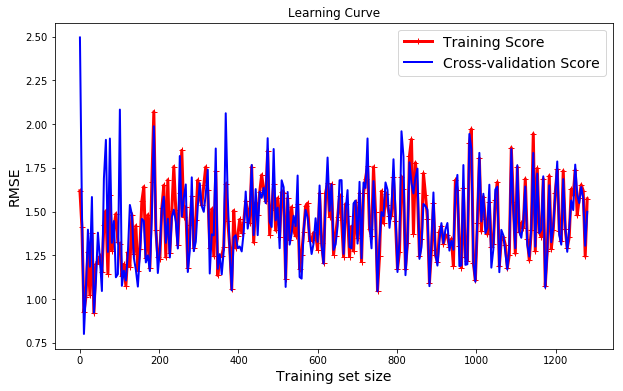

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
train_scores, val_scores = learning_curve(lm, X_train, y_train, 5, train_size=5, learning_rate=0.0001, epochs=1000, tol=None, regularizer='l2', lambd=0.1)

train_sizes = np.linspace(0, 1280, len(train_scores))
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_scores, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve")
plt.show()

In [15]:
X_train_poly = polynomialFeatures(X_train, 3)
X_test_poly = polynomialFeatures(X_test, 3)
X_test_poly.shape

(320, 63)

In [17]:
lm_poly = Linear_Regression()
cv_poly = kFold(4, X_train, y_train, lm_poly, params, 'mse')
cv_poly['mse']

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in subtract
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:192: RuntimeWarning: invalid value encountered in sign
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: RuntimeWarning: invalid value encountered in subtract
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: RuntimeWarning: invalid value encountered in multiply


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.9964244342273036,
 3.7713694012687675,
 1.8697880143775383,
 1.4992490825102744,
 2.6007882534970177,
 2.349619555614045,
 2.204433553668097,
 1.4698132173879672,
 1.9129597795339377,
 2.121827432397723,
 2.7830202784609424,
 2.0750964097988227]

In [18]:
cv_poly['mse'].index(1.4698132173879672)

55

In [19]:
print('learning rate: %f' % cv['learning_rate'][55])
print('lambd: %f' % cv['lambd'][55])
print('regularizer: %s' % cv['regularizer'][55])

learning rate: 0.000100
lambd: 0.000000
regularizer: l2


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:195: RuntimeWarning: invalid value encountered in multiply


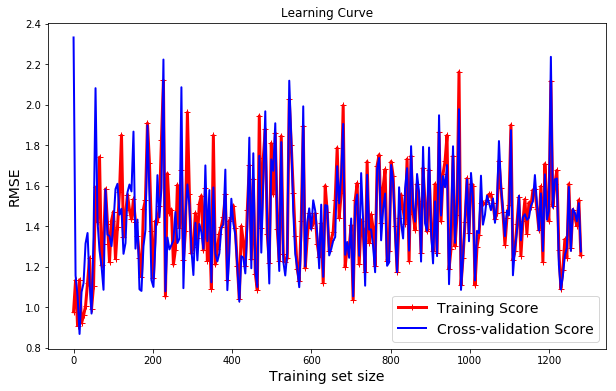

In [20]:
lm_poly.fit(X_train_poly, y_train, learning_rate=.0001, epochs=1000, tol=None, regularizer='l2', lambd=0.0)
train_scores, val_scores = learning_curve(lm_poly, X_train, y_train, 5, train_size=5, learning_rate=0.0001, epochs=1000, tol=None, regularizer='l2', lambd=0.0)

train_sizes = np.linspace(0, 1280, len(train_scores))
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_scores, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve")
plt.show()

In [28]:
stoch_lm = Linear_Regression()
stoch_lm.fit(X_train, y_train, learning_rate=.1, epochs=100, tol=None, regularizer='l2', lambd=.001, method='stochastic')

In [23]:
stoch_lm.theta

array([[-0.70756988],
       [-0.76912302],
       [-0.00509744],
       [-0.48049527],
       [-0.4445202 ],
       [-0.05430359],
       [ 1.70826335],
       [ 0.05089172],
       [ 0.4435095 ]])

In [33]:
lm_cv.theta

array([[-0.84508237],
       [-1.3864794 ],
       [ 0.19947967],
       [-0.46496482],
       [-0.00294133],
       [ 0.78766438],
       [ 0.62959994],
       [-0.5358521 ],
       [ 0.34516577]])

In [8]:
X_train_df = pd.DataFrame(X_train, columns = df.columns.values[:9])
scaled_X_train_df = pd.DataFrame(columns = df.columns.values[:9])
summary = X_train_df.describe()
for name in X_train_df.columns.values:
    scaled_X_train_df[name] = X_train_df[name].transform(lambda x: (x-summary[name]['mean'])/summary[name]['std'])
    
scaled_X_train_df

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.182066,-1.186807,-0.382494,-0.109625,-0.744521,0.450366,-0.612117,-1.347491,-0.785739
1,0.631769,-0.928621,-0.027119,-0.132493,-0.622337,-0.726316,1.699067,-0.160419,1.475386
2,3.301882,-0.876984,0.399332,-0.018149,-1.049982,-0.503701,1.500966,-0.347852,0.721678
3,-0.155212,0.981954,-0.027119,-0.315445,-0.591791,1.775458,-1.734692,-0.097942,-0.879953
4,-1.223257,1.136865,-0.240344,-0.544135,-0.194692,0.450366,-1.140387,-0.910149,-0.597312
5,0.406917,-0.980258,-0.382494,0.073327,-0.072508,-0.980734,0.906661,-0.472807,0.062183
6,0.294491,-0.360612,-0.382494,-0.315445,-0.072508,-0.959533,-1.404522,-1.409969,-1.068380
7,-0.211425,1.240140,-0.382494,7.665830,0.477321,0.609377,-1.866759,3.213365,-1.351020
8,0.238279,-1.135170,-0.169269,-0.132493,-0.316876,-0.588507,0.444425,-0.347852,-0.126244
9,0.884727,0.413945,-0.382494,0.027589,1.393702,-0.238682,-0.215914,-0.222897,-0.974166


In [9]:
scaled_X_train = scaled_X_train_df.iloc[:, :].values
scaled_X_train

array([[ 0.18206566, -1.18680677, -0.38249358, ..., -0.61211652,
        -1.34749123, -0.78573906],
       [ 0.63176896, -0.92862099, -0.02711853, ...,  1.69906735,
        -0.16041911,  1.4753862 ],
       [ 3.30188225, -0.87698383,  0.39933152, ...,  1.50096588,
        -0.34785155,  0.72167778],
       ...,
       [-1.84159914,  1.08522813, -0.38249358, ..., -0.08384592,
         0.33940073,  0.06218291],
       [ 0.40691731, -0.51552373, -0.16926855, ...,  3.54801445,
        -0.34785155,  2.32330817],
       [ 0.6036625 , -0.87698383, -0.31141857, ..., -0.14987974,
         0.58931065,  0.43903712]])

In [10]:

X_test_df = pd.DataFrame(X_test, columns = df.columns.values[:9])
scaled_X_test_df = pd.DataFrame(columns = df.columns.values[:9])
for name in X_train_df.columns.values:
    scaled_X_test_df[name] = X_test_df[name].transform(lambda x: (x-summary[name]['mean'])/summary[name]['std'])
    
scaled_X_test_df

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.998405,1.343414,0.043956,-0.384052,-0.927798,0.238351,-1.074353,-0.035464,0.533251
1,1.418750,1.240140,-0.595719,7.505747,0.599505,-0.275785,-2.064861,3.213365,-1.162593
2,0.631769,-0.308975,-0.524644,-0.132493,-0.469607,0.074039,1.831135,0.027013,-0.597312
3,-0.211425,1.601600,0.328257,0.370624,1.607525,2.146484,-1.008319,2.151248,1.004318
4,-2.066451,1.911423,-0.311419,-0.635611,0.171860,-0.959533,0.180289,0.339401,0.721678
5,-0.155212,1.188502,8.004357,2.703260,1.088242,3.005144,-1.008319,0.589311,-1.539447
6,-1.616747,0.362308,1.820832,-0.567004,-0.744521,0.344358,-0.612117,1.776383,0.439037
7,-0.436276,-0.205701,-0.453569,-0.109625,-0.866705,0.524571,-0.612117,-0.035464,-1.068380
8,0.997153,-0.876984,0.043956,-0.063887,-0.622337,0.450366,0.510459,-1.035104,-0.691526
9,0.013427,-1.083532,-0.595719,-0.292576,-0.225238,-0.318188,0.246323,-1.097581,-0.597312


In [11]:
scaled_X_test = scaled_X_test_df.iloc[:, :].values
scaled_X_test

array([[-0.99840547,  1.34341391,  0.04395648, ..., -1.07435329,
        -0.03546415,  0.53325067],
       [ 1.41874971,  1.2401396 , -0.5957186 , ..., -2.06486067,
         3.2133648 , -1.16259327],
       [ 0.63176896, -0.30897511, -0.52464359, ...,  1.831135  ,
         0.02701333, -0.59731196],
       ...,
       [-1.6167475 ,  1.13686528, -0.52464359, ..., -0.87625182,
         2.52611252,  0.53325067],
       [-1.05461839,  0.77540519, -0.52464359, ..., -0.87625182,
        -0.66023895,  0.91010488],
       [ 1.44685617, -1.3933554 ,  0.04395648, ...,  0.31235703,
         1.27656292, -0.97416617]])

In [22]:
lm_scaled = Linear_Regression()
cv_scaled = kFold(4, scaled_X_train, y_train, lm_scaled, params, 'mse')
cv_scaled['mse']

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:193: RuntimeWarning: invalid value encountered in sign
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in subtract
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:196: RuntimeWarning: invalid value encountered in subtract
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:196: RuntimeWarning: invalid value encountered in multiply


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.7210219699252587,
 2.1373020473376214,
 2.4142743001781297,
 1.4219308232184809,
 2.5950126675074285,
 1.5800841010783109,
 2.787118805777188,
 1.4740856073848216,
 1.5923848622995922,
 3.22179117304223,
 2.707078220938619,
 3.5825194043626745]

In [23]:
cv_scaled['mse'].index(1.4219308232184809)

51

In [24]:
print('learning rate: %f' % cv_scaled['learning_rate'][51])
print('lambd: %f' % cv_scaled['lambd'][51])
print('regularizer: %s' % cv_scaled['regularizer'][51])

learning rate: 0.000100
lambd: 0.010000
regularizer: l1


In [12]:
lm_scaled = Linear_Regression()
lm_scaled.fit(X_train, y_train, learning_rate=.0001, epochs=1000, tol=None, regularizer='l1', lambd=.1)

In [13]:
y_pred = lm_scaled.predict(scaled_X_train)
y_pred

array([[-0.15438806],
       [-1.74251912],
       [-4.16323606],
       ...,
       [-5.23965365],
       [-1.4167486 ],
       [-0.74514306]])

In [14]:
mse(y_train, y_pred)

41.63256708690824

In [94]:
lm_cv.theta

array([[-1.60365288],
       [-1.43334156],
       [-0.18241436],
       [ 1.0504089 ],
       [ 0.00791401],
       [-1.30678699],
       [-1.09731206],
       [-0.14444007],
       [ 1.13890435]])

In [71]:
train_scores, val_scores = learning_curve(lm, X_train, y_train, 5, train_size=5, learning_rate=0.0001, epochs=1000, tol=None, regularizer=None, lambd=0.0)


0.0001
1279
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
12

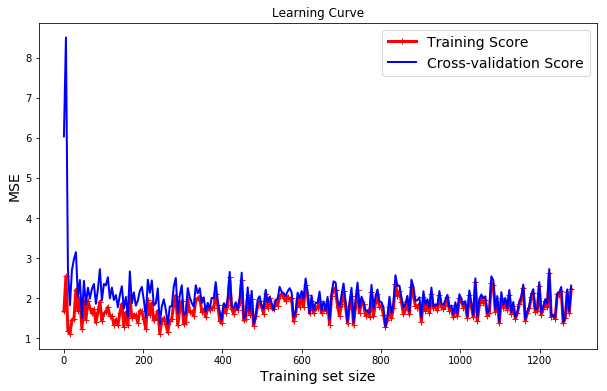

In [75]:
import matplotlib.pyplot as plt 
%matplotlib inline
train_sizes = np.linspace(0, 1280, len(train_scores))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_scores, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("MSE", fontsize=14) 
plt.title("Learning Curve")
plt.show()

In [16]:
min(df['quality'])

3

In [ ]:
summary_stats = df.describe()

In [ ]:
summary_stats.to_excel('C:/Users/Henry/CSCE 478/summary_stats.xlsx')

In [ ]:
cv.to_excel('C:/Users/Henry/CSCE 478/cv_table2.xlsx')